Using plaidml.keras.backend backend.
Unable to revert mtime: /Library/Fonts
2021-10-17 00:32:31.199 python[51230:764298] apply_selection_policy_once: prefer use of removable GPUs (via (null):GPUSelectionPolicy->preferRemovable)
INFO:plaidml:Opening device "metal_amd_radeon_rx_580.0"


Train on 80000 samples, validate on 20000 samples
Epoch 1/10
80000/80000 [==============================] - 3s 32us/step - loss: 1218.1484 - val_loss: 2.6579
Epoch 2/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.3126 - val_loss: 0.1103
Epoch 3/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.1009 - val_loss: 0.0942
Epoch 4/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0877 - val_loss: 0.0824
Epoch 5/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0751 - val_loss: 0.0686
Epoch 6/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0609 - val_loss: 0.0541
Epoch 7/10
80000/80000 [==============================] - 2s 28us/step - loss: 0.0468 - val_loss: 0.0399
Epoch 8/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0330 - val_loss: 0.0267
Epoch 9/10
80000/80000 [==============================] - 2s 27us/step - loss: 0.0212 - val_loss: 0.0164
Ep

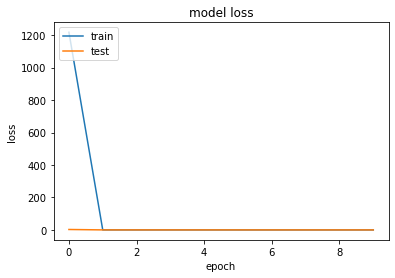

In [1]:
import numpy as np
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
from keras.layers import Dense
from matplotlib import pyplot as plt
#Plaidml:https://github.com/plaidml/plaidml
# Params
num_samples = 100000; vect_len = 20; max_int = 10; min_int = 1;

# Generate dataset
X = np.random.randint(min_int, max_int, (num_samples, vect_len))
Y = np.sum(X, axis=1)

# Get 80% of data for training
split_idx = int(0.8 * len(Y))
train_X = X[:split_idx, :]; test_X = X[split_idx:, :]
train_Y = Y[:split_idx]; test_Y = Y[split_idx:]

# Make model
model = keras.models.Sequential()
model.add(keras.layers.Dense(32, activation='relu', input_shape=(vect_len,)))
model.add(keras.layers.Dense(1))
model.compile('adam', 'mse')

history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), \
                    epochs=10, batch_size=100)

# summarize history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()